In [80]:
import sys
sys.path.append('../')

In [81]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier, QFT

In [97]:
num_qubits = 5

In [112]:
dev = qml.device( "default.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : x**2/2,
                    lambda p : p**2/2,
                    dev,
                    semi_classical = False,
                    )

In [113]:
val, min_state = varqft.min_energy_eigens()

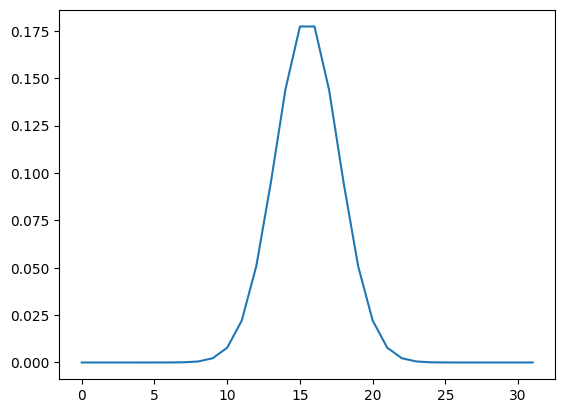

In [114]:
plt.plot( np.abs(min_state)**2 )

In [115]:
min_state

tensor([1.92704891e-06+0.00000000e+00j, 7.64791623e-06+5.49971276e-18j,
        3.25215443e-05+1.17546547e-17j, 1.25727501e-04+1.73012458e-17j,
        4.38244768e-04+5.28072160e-17j, 1.37665948e-03+1.30696836e-16j,
        3.89713731e-03+3.49610730e-16j, 9.94198465e-03+8.74382062e-16j,
        2.28564382e-02+2.01579152e-15j, 4.73535004e-02+4.20496421e-15j,
        8.84104680e-02+7.87330581e-15j, 1.48752186e-01+1.32798961e-14j,
        2.25543903e-01+2.01613831e-14j, 3.08181733e-01+2.76621295e-14j,
        3.79481632e-01+3.40893956e-14j, 4.21097529e-01+3.77622533e-14j,
        4.21097529e-01+3.77957661e-14j, 3.79481632e-01+3.41309059e-14j,
        3.08181733e-01+2.77648474e-14j, 2.25543903e-01+2.03630251e-14j,
        1.48752186e-01+1.34471127e-14j, 8.84104680e-02+8.02387133e-15j,
        4.73535004e-02+4.28971620e-15j, 2.28564382e-02+2.07282791e-15j,
        9.94198465e-03+9.08551540e-16j, 3.89713731e-03+3.51256858e-16j,
        1.37665948e-03+1.22531833e-16j, 4.38244768e-04+4.0278981

In [126]:
def init_state():
    # qml.MottonenStatePreparation(min_state, wires=range(num_qubits) )
    for k in range(num_qubits):
        qml.RX(np.pi/5,k)
        qml.RZ(np.pi/3,k)
    # pass
    # qml.Hadamard(0)

In [127]:
varqft._set_init_state( init_state )

In [128]:
varqft.matrix_P()

tensor([[-0.30434179+0.00000000e+00j,  0.30434179-3.09003403e+00j,
         -0.30434179+1.53002949e+00j, ...,  0.30434179+1.00328042e+00j,
         -0.30434179-1.53002949e+00j,  0.30434179+3.09003403e+00j],
        [ 0.30434179+3.09003403e+00j, -0.30434179+3.90272028e-17j,
          0.30434179-3.09003403e+00j, ..., -0.30434179-7.34746073e-01j,
          0.30434179+1.00328042e+00j, -0.30434179-1.53002949e+00j],
        [-0.30434179-1.53002949e+00j,  0.30434179+3.09003403e+00j,
         -0.30434179+2.69478827e-19j, ...,  0.30434179+5.69383438e-01j,
         -0.30434179-7.34746073e-01j,  0.30434179+1.00328042e+00j],
        ...,
        [ 0.30434179-1.00328042e+00j, -0.30434179+7.34746073e-01j,
          0.30434179-5.69383438e-01j, ..., -0.30434179+2.21786327e-17j,
          0.30434179-3.09003403e+00j, -0.30434179+1.53002949e+00j],
        [-0.30434179+1.53002949e+00j,  0.30434179-1.00328042e+00j,
         -0.30434179+7.34746073e-01j, ...,  0.30434179+3.09003403e+00j,
         -0.30434179

In [129]:
varqft.Fourier()

tensor([[ 0.1767767 +0.j        ,  0.1767767 +0.j        ,
          0.1767767 +0.j        , ...,  0.1767767 +0.j        ,
          0.1767767 +0.j        ,  0.1767767 +0.j        ],
        [ 0.1767767 +0.j        ,  0.17337998-0.03448742j,
          0.16332037-0.06764951j, ...,  0.14698445+0.09821187j,
          0.16332037+0.06764951j,  0.17337998+0.03448742j],
        [ 0.1767767 +0.j        ,  0.16332037-0.06764951j,
          0.125     -0.125j     , ...,  0.06764951+0.16332037j,
          0.125     +0.125j     ,  0.16332037+0.06764951j],
        ...,
        [ 0.1767767 +0.j        ,  0.14698445+0.09821187j,
          0.06764951+0.16332037j, ..., -0.03448742-0.17337998j,
          0.06764951-0.16332037j,  0.14698445-0.09821187j],
        [ 0.1767767 +0.j        ,  0.16332037+0.06764951j,
          0.125     +0.125j     , ...,  0.06764951-0.16332037j,
          0.125     -0.125j     ,  0.16332037-0.06764951j],
        [ 0.1767767 +0.j        ,  0.17337998+0.03448742j,
          0.1

(<Figure size 500x600 with 1 Axes>, <Axes: >)

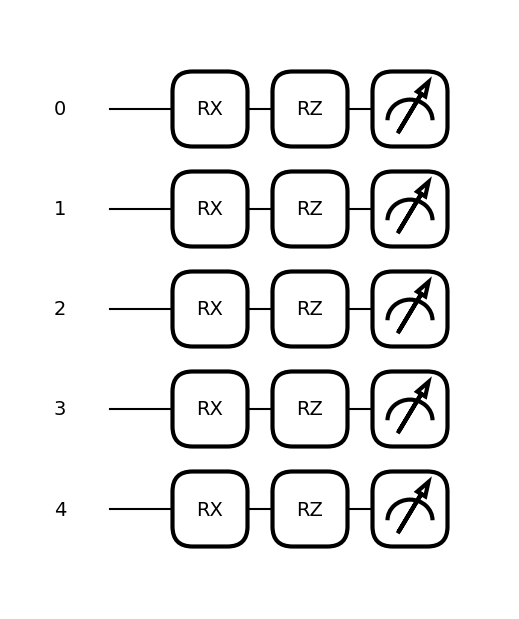

In [130]:
qml.draw_mpl( varqft.X_probs() )()

(<Figure size 2000x600 with 1 Axes>, <Axes: >)

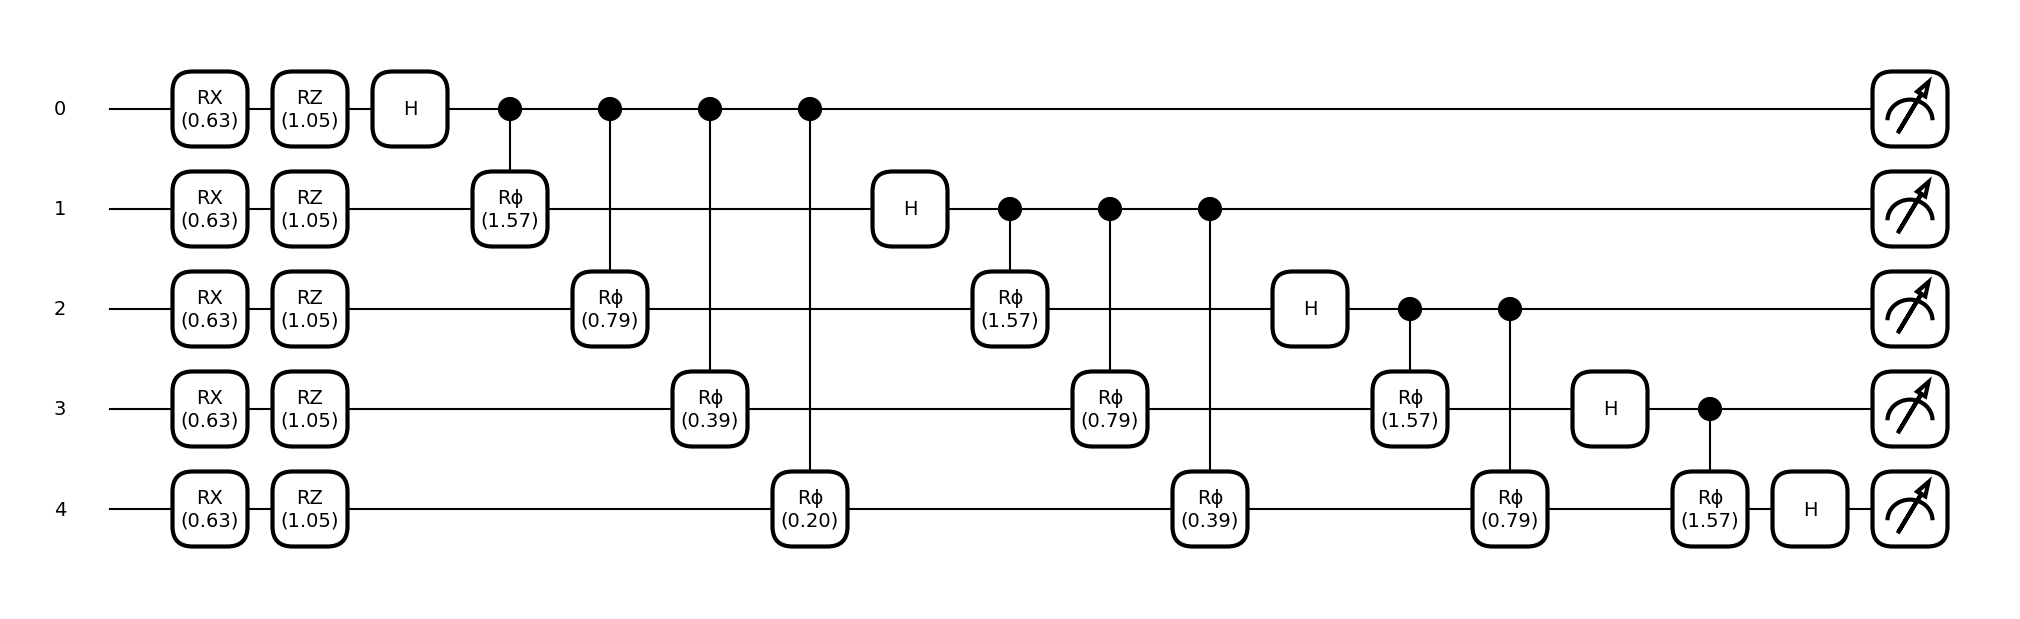

In [131]:
qml.draw_mpl( varqft.P_eval(), decimals=2 )()

In [132]:
varqft.X_eval()()

tensor(9.7137782, requires_grad=True)

In [133]:
varqft.P_eval()()

tensor(10.75989514, requires_grad=True)

In [134]:
varqft.energy_eval()

tensor(20.47367335, requires_grad=True)

In [135]:
varqft.matrix_P()

tensor([[-0.30434179+0.00000000e+00j,  0.30434179-3.09003403e+00j,
         -0.30434179+1.53002949e+00j, ...,  0.30434179+1.00328042e+00j,
         -0.30434179-1.53002949e+00j,  0.30434179+3.09003403e+00j],
        [ 0.30434179+3.09003403e+00j, -0.30434179+3.90272028e-17j,
          0.30434179-3.09003403e+00j, ..., -0.30434179-7.34746073e-01j,
          0.30434179+1.00328042e+00j, -0.30434179-1.53002949e+00j],
        [-0.30434179-1.53002949e+00j,  0.30434179+3.09003403e+00j,
         -0.30434179+2.69478827e-19j, ...,  0.30434179+5.69383438e-01j,
         -0.30434179-7.34746073e-01j,  0.30434179+1.00328042e+00j],
        ...,
        [ 0.30434179-1.00328042e+00j, -0.30434179+7.34746073e-01j,
          0.30434179-5.69383438e-01j, ..., -0.30434179+2.21786327e-17j,
          0.30434179-3.09003403e+00j, -0.30434179+1.53002949e+00j],
        [-0.30434179+1.53002949e+00j,  0.30434179-1.00328042e+00j,
         -0.30434179+7.34746073e-01j, ...,  0.30434179+3.09003403e+00j,
         -0.30434179